## About Dataset

**Dataset:** 

* AirBnb - Singapore market
* Data source: Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.
* Scrape date: Dec 26,2021 
* Number of Recording: 3672 entries








### Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listing = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Airbnb-Singapore/main/listings2.csv')

In [3]:
listing.shape

(3672, 74)

In [4]:
listing = listing[listing['neighbourhood_group_cleansed'] == 'Central Region']

In [5]:
listing.shape

(2909, 74)

In [6]:
# check column names
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Audience

* The target audiences that the project toward to are: Hosts having listing in central area

## Question

Airbnb is a booking platform for listing and renting local homes. Since both hosts and travelers
can easily exchange the services in Airbnb, a good pricing strategy could create a competitive
advantage for hosts.
This project aims to answer the question: how much could an Airbnb host charge per night in Central Region in Singapore?

# A - Data Cleaning

## A1 - Remove unwanted observations

### UNNECCESSARY COLUMNS (with explanation)

### DROP COLUMNS

In [7]:
#DROP UNECESSARY COLUMS
columns = ['listing_url','scrape_id','last_scraped', 'description', 'neighborhood_overview', 'picture_url','host_url','host_name','host_id','number_of_reviews_ltm','number_of_reviews_l30d','host_since','id','number_of_reviews','review_scores_rating',
           'host_location', 'host_about','host_picture_url','host_thumbnail_url','host_verifications', 'neighbourhood_cleansed','neighbourhood_group_cleansed',
           'neighbourhood', 'bathrooms','availability_30','availability_60','availability_90','availability_365','property_type','host_listings_count',
           'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'first_review','last_review','reviews_per_month',
           'calendar_updated','calendar_last_scraped', 'host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','name','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license','host_neighbourhood','amenities']

listing_clean = listing.drop(columns= columns)

In [8]:
# check infor after columns dropping
listing_clean.isna().sum()

host_response_time        274
host_response_rate        274
host_acceptance_rate      446
host_is_superhost          11
host_has_profile_pic       11
host_identity_verified     11
latitude                    0
longitude                   0
room_type                   0
accommodates                0
bathrooms_text             24
bedrooms                  378
beds                      100
price                       0
minimum_nights              0
maximum_nights              0
has_availability            0
instant_bookable            0
dtype: int64

In [9]:
#check duplication
listing_clean.duplicated().sum()

31

In [10]:
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 3670
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      2635 non-null   object 
 1   host_response_rate      2635 non-null   object 
 2   host_acceptance_rate    2463 non-null   object 
 3   host_is_superhost       2898 non-null   object 
 4   host_has_profile_pic    2898 non-null   object 
 5   host_identity_verified  2898 non-null   object 
 6   latitude                2909 non-null   float64
 7   longitude               2909 non-null   float64
 8   room_type               2909 non-null   object 
 9   accommodates            2909 non-null   int64  
 10  bathrooms_text          2885 non-null   object 
 11  bedrooms                2531 non-null   float64
 12  beds                    2809 non-null   float64
 13  price                   2909 non-null   object 
 14  minimum_nights          2909 non-null   

## A2 - Handle uncorrect Datatype

In [11]:
# Change Data-type 
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')
listing_clean['host_acceptance_rate'] = listing_clean['host_acceptance_rate'].str.replace('%','').astype('float')

In [12]:
# Change Data-type 
listing_clean['price'] = listing_clean['price'].str.replace(r'[$,]', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### Drop: Property

In [13]:
# step 1: takes the "number " out the the strings of the column
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'[a-zA-Z\s]', '')
# replace the '' values to 1:
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'\D$','1')
# turn the type to float
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].astype('float')
# change the name to barthrooms
listing_clean.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [14]:
#re-check data type after changing type

listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 3670
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      2635 non-null   object 
 1   host_response_rate      2635 non-null   float64
 2   host_acceptance_rate    2463 non-null   float64
 3   host_is_superhost       2898 non-null   object 
 4   host_has_profile_pic    2898 non-null   object 
 5   host_identity_verified  2898 non-null   object 
 6   latitude                2909 non-null   float64
 7   longitude               2909 non-null   float64
 8   room_type               2909 non-null   object 
 9   accommodates            2909 non-null   int64  
 10  bathrooms               2885 non-null   float64
 11  bedrooms                2531 non-null   float64
 12  beds                    2809 non-null   float64
 13  price                   2909 non-null   float64
 14  minimum_nights          2909 non-null   

In [15]:
listing_clean.shape

(2909, 18)

## A3 - Handle Missing Values

### Drop missing values

In [16]:
#check number of missing value
listing_clean = listing_clean.dropna(axis = 0)
listing_clean.isna().sum()

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
maximum_nights            0
has_availability          0
instant_bookable          0
dtype: int64

In [17]:
listing_clean.shape

(2014, 18)

# B - Exploratory Data Analysis

In [18]:
listing_clean.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,instant_bookable
5,within a few hours,87.0,77.0,f,t,t,1.28836,103.81144,Private room,1,1.0,1.0,1.0,40.0,14,999,t,f
6,within a few hours,95.0,0.0,f,t,t,1.31142,103.83924,Private room,2,1.0,1.0,1.0,72.0,90,1125,t,f
7,within a few hours,87.0,77.0,f,t,t,1.28828,103.81020,Private room,1,0.0,1.0,1.0,49.0,14,999,t,f
9,within a few hours,87.0,77.0,f,t,t,1.28636,103.81138,Private room,1,4.0,1.0,1.0,59.0,60,999,t,f
12,within a few hours,95.0,0.0,f,t,t,1.31144,103.83784,Private room,2,1.0,1.0,1.0,69.0,3,180,t,f


In [19]:
listing_clean.describe()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.00000,2014.000000
mean,82.497517,61.796425,1.302249,103.849498,3.173784,1.734608,1.358491,2.039722,209.277061,32.82423,914.470209
std,27.643762,34.467236,0.016351,0.023438,2.569953,1.505644,0.691719,2.537432,266.518204,56.56646,368.218267
min,0.000000,0.000000,1.245350,103.761490,1.000000,0.000000,1.000000,1.000000,15.000000,1.00000,1.000000
25%,81.000000,31.000000,1.288728,103.840505,2.000000,1.000000,1.000000,1.000000,72.000000,3.00000,999.000000
50%,95.000000,72.000000,1.304020,103.848810,2.000000,1.000000,1.000000,1.000000,147.000000,7.00000,1125.000000
75%,100.000000,96.000000,1.313575,103.860640,4.000000,2.000000,2.000000,2.000000,241.000000,90.00000,1125.000000
max,100.000000,100.000000,1.364410,103.907052,16.000000,21.000000,8.000000,46.000000,4159.000000,1000.00000,1125.000000


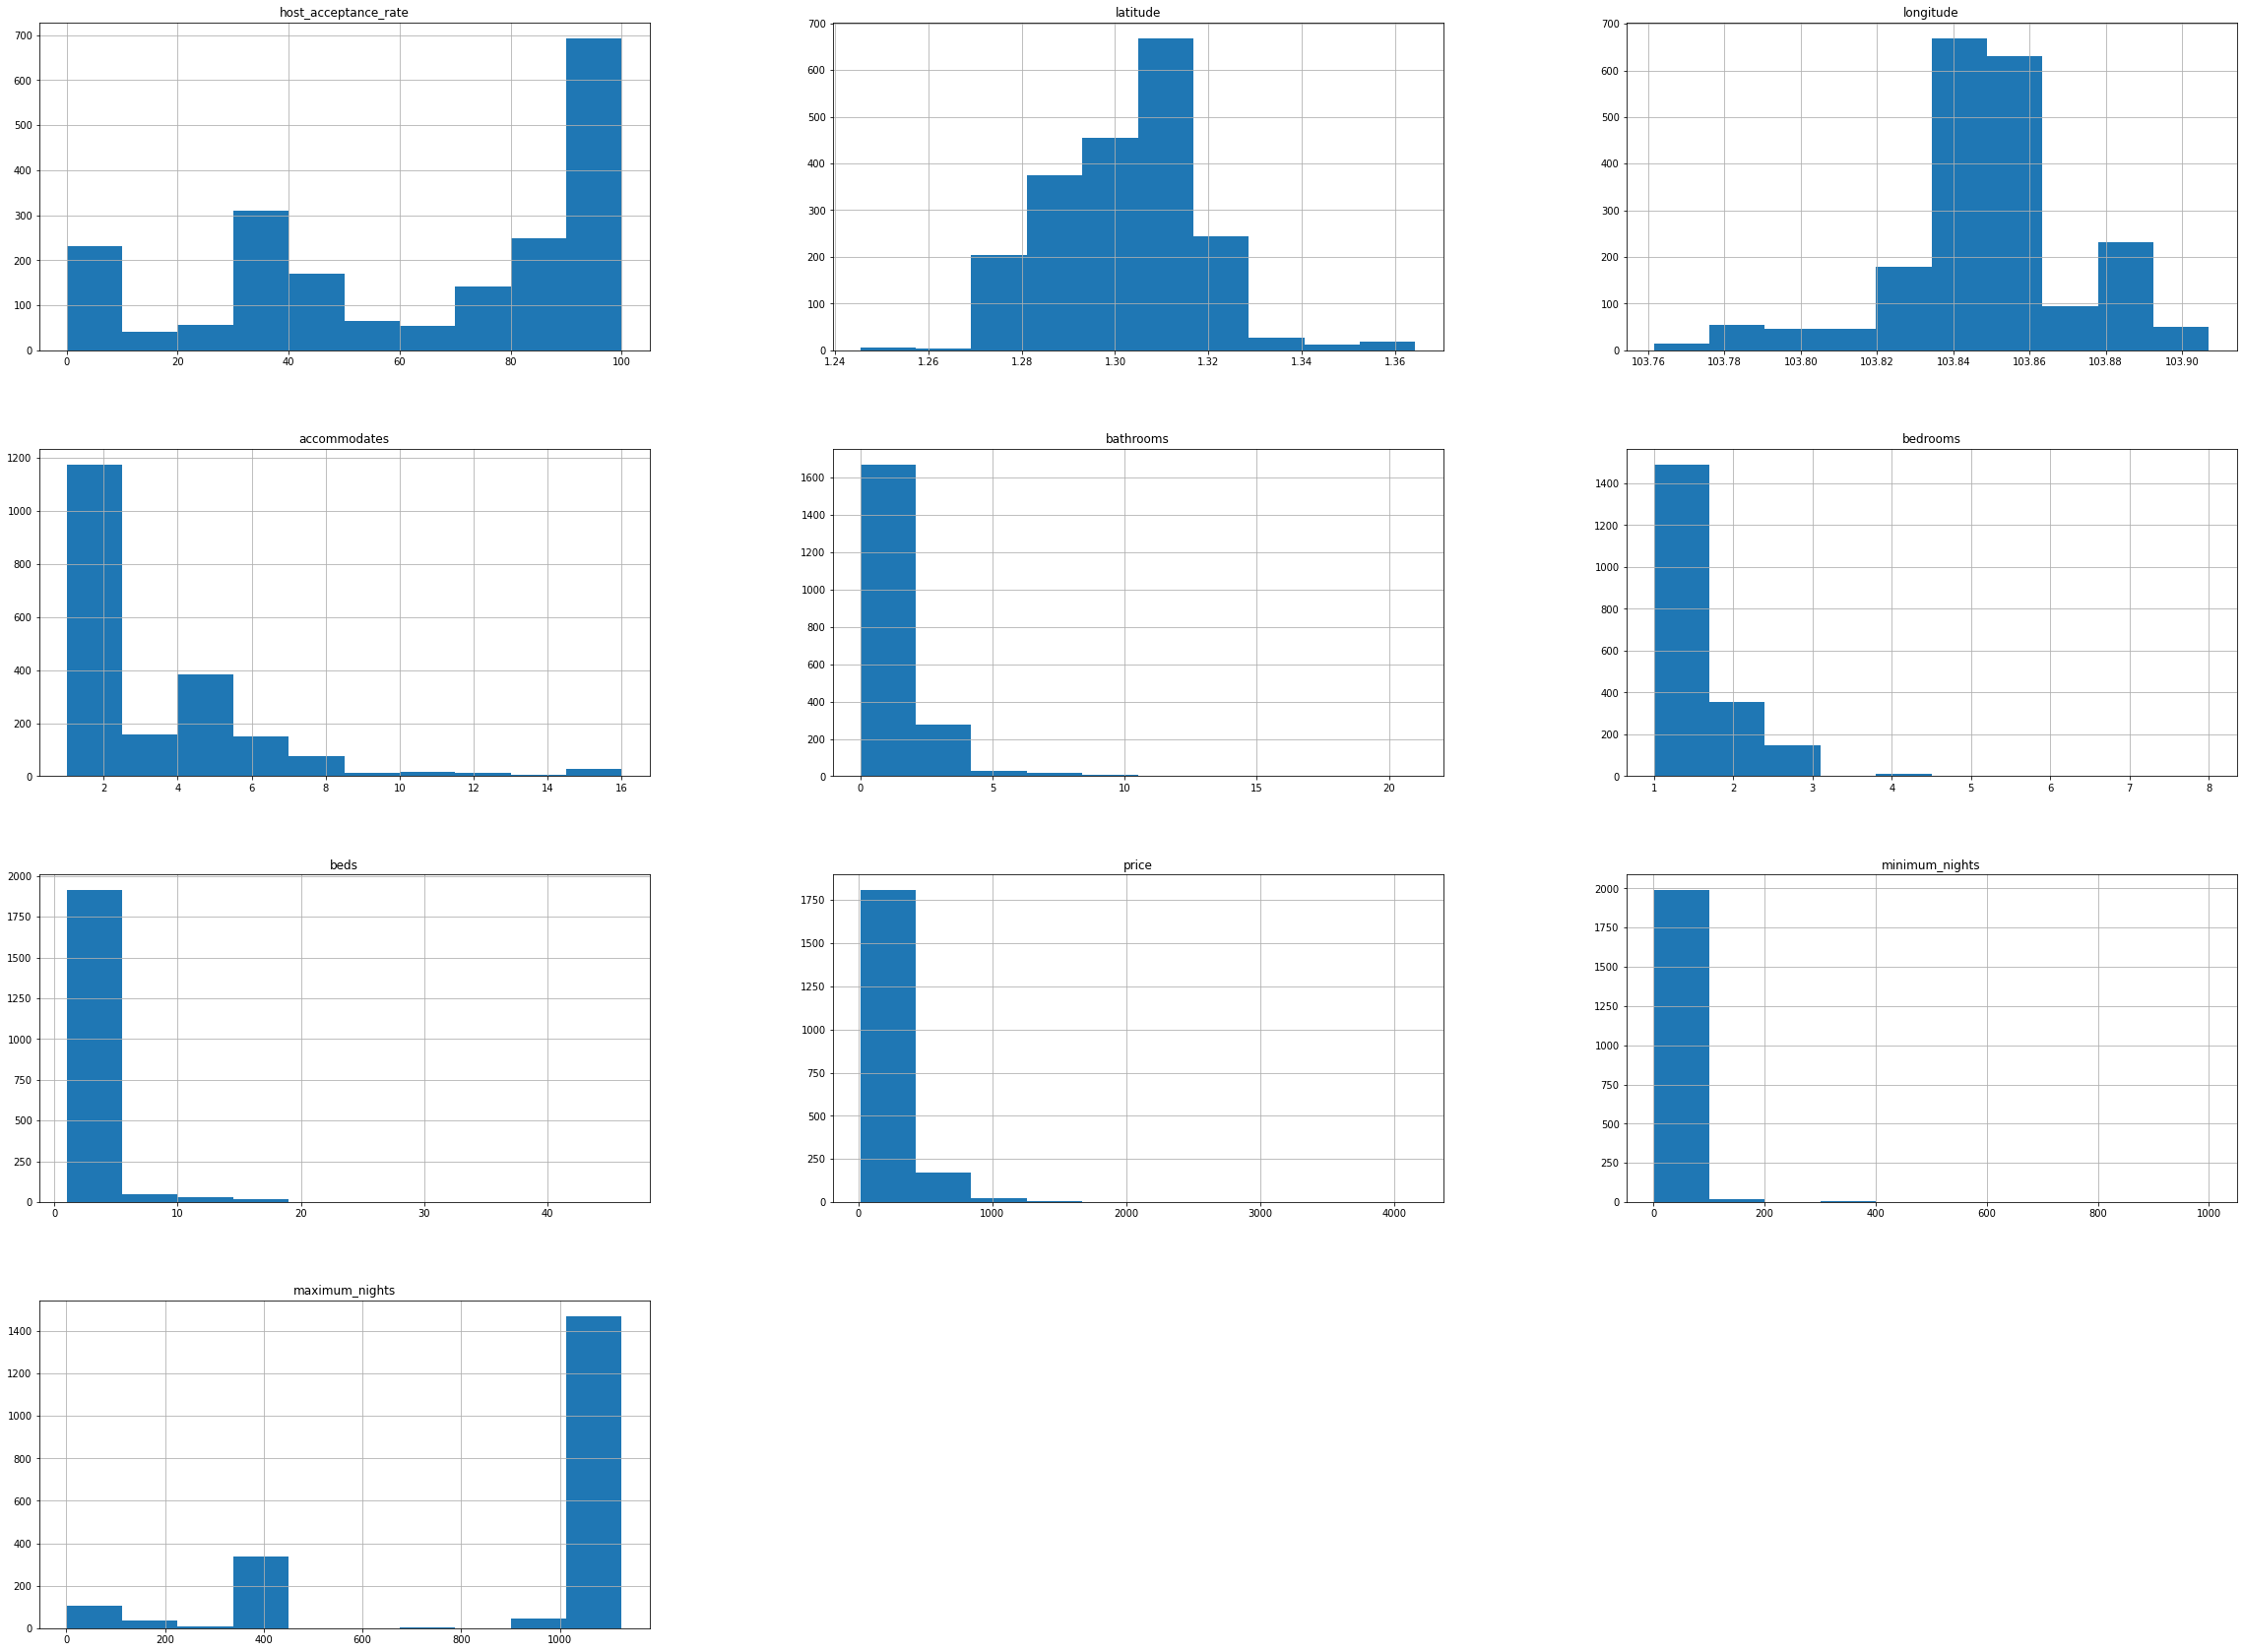

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
listing_clean.iloc[:,2:].hist(figsize=(40,30), bins = 10)
plt.show()

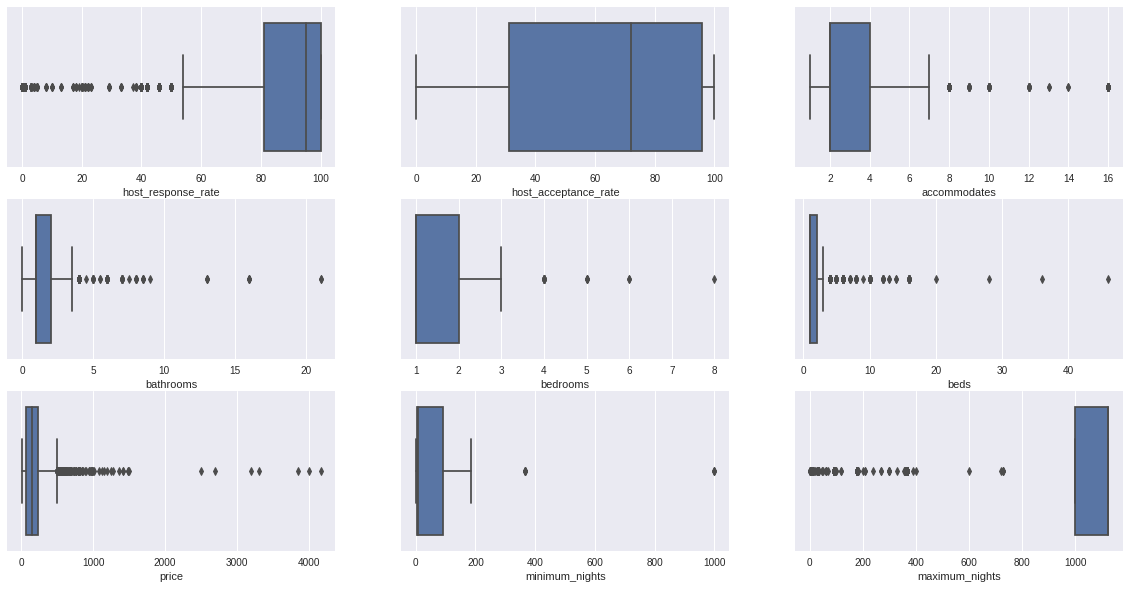

In [21]:
# Outliers - listing.gz / review columns

plt.style.use('seaborn')


plt.figure(figsize=(20, 10))

plt.subplot(331)
rating = listing_clean['host_response_rate'].reset_index()
sns.boxplot(data=rating, x = 'host_response_rate')

plt.subplot(332)
accuracy = listing_clean['host_acceptance_rate'].reset_index()
sns.boxplot(data=accuracy, x = 'host_acceptance_rate')

plt.subplot(333)
checkin = listing_clean['accommodates'].reset_index()
sns.boxplot(data=checkin, x = 'accommodates')

plt.subplot(334)
communication = listing_clean['bathrooms'].reset_index()
sns.boxplot(data=communication, x = 'bathrooms')

plt.subplot(335)
location = listing_clean['bedrooms'].reset_index()
sns.boxplot(data=location, x = 'bedrooms')

plt.subplot(336)
value = listing_clean['beds'].reset_index()
sns.boxplot(data=value, x = 'beds')

plt.subplot(337)
value = listing_clean['price'].reset_index()
sns.boxplot(data=value, x = 'price')

plt.subplot(338)
value = listing_clean['minimum_nights'].reset_index()
sns.boxplot(data=value, x = 'minimum_nights')

plt.subplot(339)
value = listing_clean['maximum_nights'].reset_index()
sns.boxplot(data=value, x = 'maximum_nights')


plt.show()

In [22]:
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 5 to 3670
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      2014 non-null   object 
 1   host_response_rate      2014 non-null   float64
 2   host_acceptance_rate    2014 non-null   float64
 3   host_is_superhost       2014 non-null   object 
 4   host_has_profile_pic    2014 non-null   object 
 5   host_identity_verified  2014 non-null   object 
 6   latitude                2014 non-null   float64
 7   longitude               2014 non-null   float64
 8   room_type               2014 non-null   object 
 9   accommodates            2014 non-null   int64  
 10  bathrooms               2014 non-null   float64
 11  bedrooms                2014 non-null   float64
 12  beds                    2014 non-null   float64
 13  price                   2014 non-null   float64
 14  minimum_nights          2014 non-null   

In [23]:
corr_table=listing_clean.corr()
corr_table

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights
host_response_rate,1.000000,0.409867,-0.086563,-0.004730,-0.086177,-0.050273,-0.040897,-0.107371,0.042566,0.082939,0.003141
host_acceptance_rate,0.409867,1.000000,-0.070285,0.132879,-0.208164,-0.036522,-0.184610,-0.142376,-0.153365,-0.025052,-0.104906
latitude,-0.086563,-0.070285,1.000000,0.321947,0.084883,0.091559,0.111743,0.061606,-0.156090,0.055525,0.012879
longitude,-0.004730,0.132879,0.321947,1.000000,0.028029,0.087639,-0.062410,0.051892,-0.184772,0.055504,-0.071743
accommodates,-0.086177,-0.208164,0.084883,0.028029,1.000000,0.292186,0.486388,0.766371,0.236382,-0.116067,0.143616
bathrooms,-0.050273,-0.036522,0.091559,0.087639,0.292186,1.000000,0.141718,0.334659,-0.007504,-0.128437,0.019163
bedrooms,-0.040897,-0.184610,0.111743,-0.062410,0.486388,0.141718,1.000000,0.233873,0.417814,-0.006324,0.168743
beds,-0.107371,-0.142376,0.061606,0.051892,0.766371,0.334659,0.233873,1.000000,0.087751,-0.102889,0.029603
price,0.042566,-0.153365,-0.156090,-0.184772,0.236382,-0.007504,0.417814,0.087751,1.000000,-0.136027,0.144654
minimum_nights,0.082939,-0.025052,0.055525,0.055504,-0.116067,-0.128437,-0.006324,-0.102889,-0.136027,1.000000,0.021053


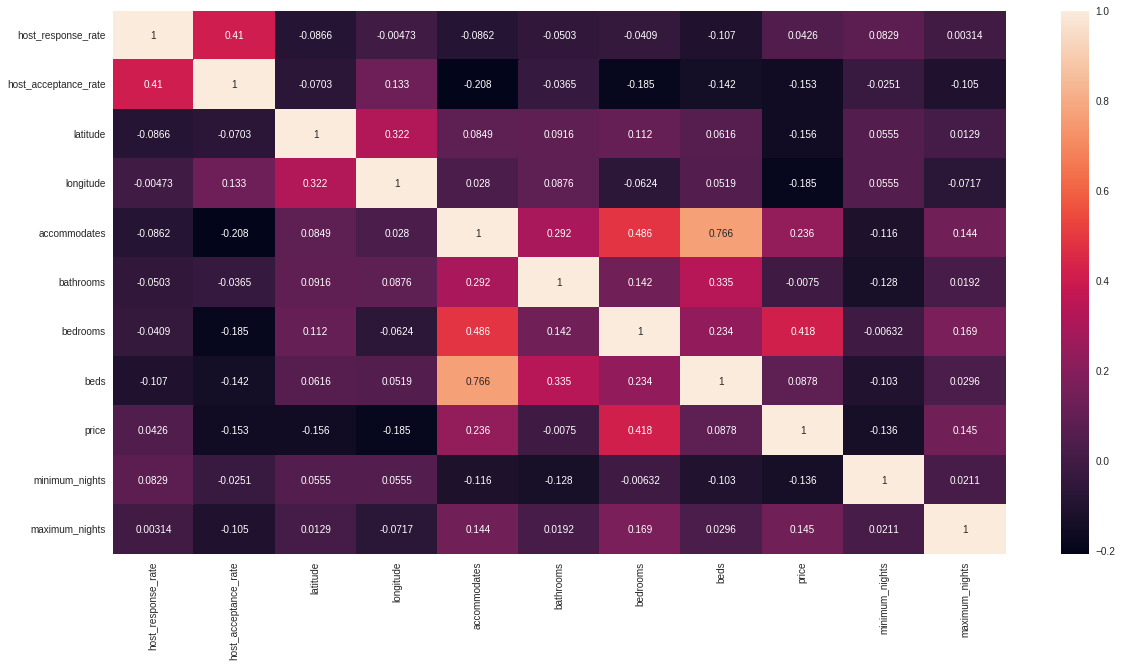

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(listing_clean.corr(), annot=True, fmt=".3g")
plt.show()

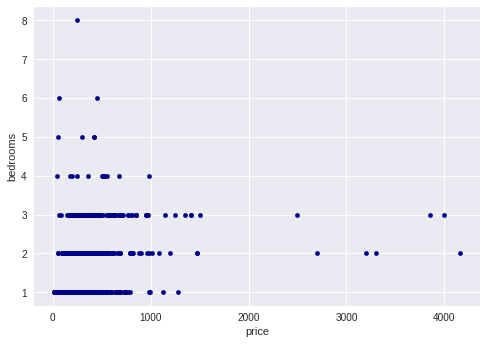

In [25]:
listing_clean.plot.scatter(x='price',y='bedrooms',c='DarkBlue')


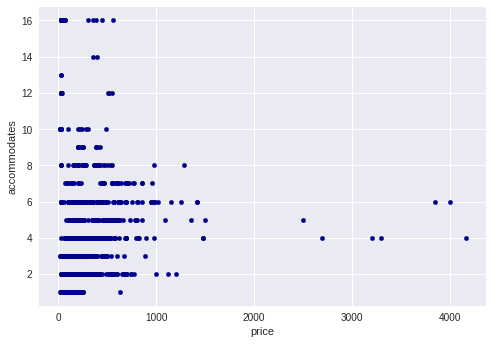

In [26]:
listing_clean.plot.scatter(x='price',y='accommodates',c='DarkBlue')

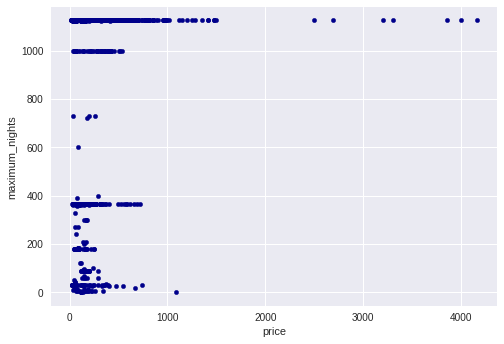

In [27]:
listing_clean.plot.scatter(x='price',y='maximum_nights',c='DarkBlue')


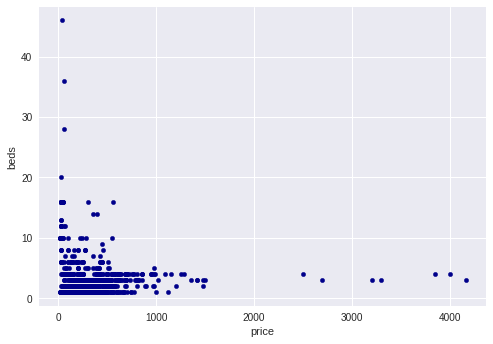

In [28]:
listing_clean.plot.scatter(x='price',y='beds',c='DarkBlue')

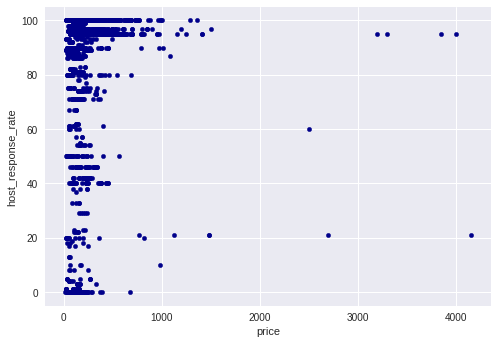

In [29]:
listing_clean.plot.scatter(x='price',y='host_response_rate',c='DarkBlue')

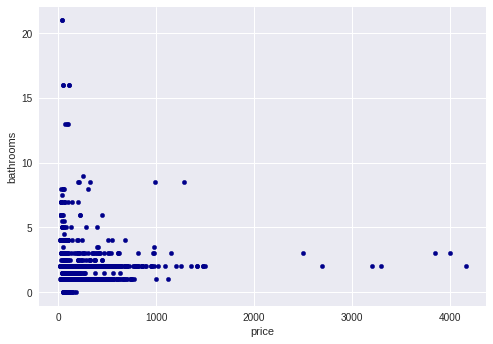

In [30]:
listing_clean.plot.scatter(x='price',y='bathrooms',c='DarkBlue')

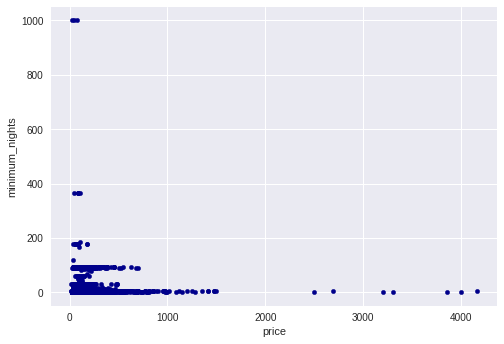

In [31]:
listing_clean.plot.scatter(x='price',y='minimum_nights',c='DarkBlue')

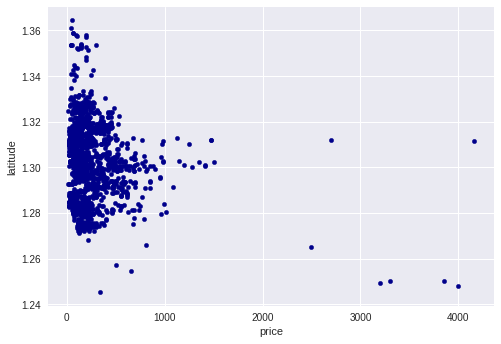

In [32]:
listing_clean.plot.scatter(x='price',y='latitude',c='DarkBlue')

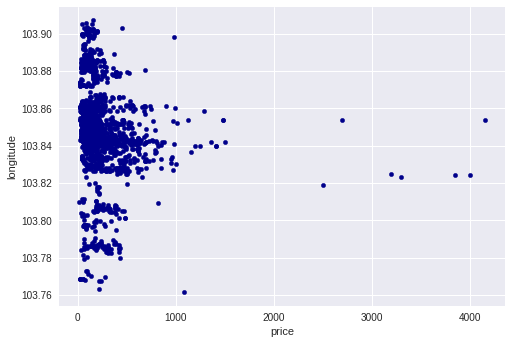

In [33]:
listing_clean.plot.scatter(x='price',y='longitude',c='DarkBlue')

# ML methods

In [34]:
corr_table['price'].sort_values(ascending=False)

price                   1.000000
bedrooms                0.417814
accommodates            0.236382
maximum_nights          0.144654
beds                    0.087751
host_response_rate      0.042566
bathrooms              -0.007504
minimum_nights         -0.136027
host_acceptance_rate   -0.153365
latitude               -0.156090
longitude              -0.184772
Name: price, dtype: float64

In [35]:
X, y = listing_clean.loc[:, listing_clean.columns != 'price'], listing_clean['price']

In [36]:
X.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'has_availability', 'instant_bookable'],
      dtype='object')

In [37]:
X = pd.get_dummies(X, columns=["host_response_time","host_is_superhost","host_has_profile_pic", 'host_identity_verified','room_type','has_availability', 'instant_bookable'], prefix=["host_response_time","host_is_superhost","host_has_profile_pic", 'host_identity_verified','room_type','has_availability', 'instant_bookable'], drop_first=True) #we add a prefix for easier identification

In [38]:
X.head()

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,...,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_has_profile_pic_t,host_identity_verified_t,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_t,instant_bookable_t
5,87.0,77.0,1.28836,103.81144,1,1.0,1.0,1.0,14,999,...,1,0,0,1,1,0,1,0,1,0
6,95.0,0.0,1.31142,103.83924,2,1.0,1.0,1.0,90,1125,...,1,0,0,1,1,0,1,0,1,0
7,87.0,77.0,1.28828,103.81020,1,0.0,1.0,1.0,14,999,...,1,0,0,1,1,0,1,0,1,0
9,87.0,77.0,1.28636,103.81138,1,4.0,1.0,1.0,60,999,...,1,0,0,1,1,0,1,0,1,0
12,95.0,0.0,1.31144,103.83784,2,1.0,1.0,1.0,3,180,...,1,0,0,1,1,0,1,0,1,0


In [39]:
from sklearn.model_selection import train_test_split
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

## Linear Regression Model

In [40]:
from sklearn.model_selection import KFold
k, shuffle, seed = 3, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import absolute,mean
import numpy as np

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [43]:
tr_errors = [] 
val_errors = []
for j, (train_indices, val_indices) in enumerate(kfold.split(X_rem)): 
  X_train, y_train, X_val, y_val = X_rem.iloc[train_indices], y_rem.iloc[train_indices], X_rem.iloc[val_indices], y_rem.iloc[val_indices]
        
  lin_regr = LinearRegression() 
  lin_regr.fit(X_train, y_train)   
  y_pred_train = lin_regr.predict(X_train)    # predict using the linear model
  tr_error = mean_absolute_error(y_train, y_pred_train)    # calculate the training error
  y_pred_val = lin_regr.predict(X_val) # predict labels for the validation data using the linear model 
  val_error = mean_absolute_error(y_val, y_pred_val) # calculate the validation error
  tr_errors.append(tr_error) 
  val_errors.append(val_error)
    

In [44]:
mean(tr_errors)

97.02356476695938

In [45]:
mean(val_errors)

98.41369994534428

## Polynomial Regression Model

In [46]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [50]:
from sklearn.linear_model import RidgeCV, Ridge
ridgecv = RidgeCV(alphas=alphas).fit(X_rem, y_rem)
ridgecv.alpha_

0.06164233697210317

In [51]:
## define a list of values for the maximum polynomial degree 
degrees = [1, 2, 3, 4, 5 , 6]    

tr_errors = {}          
val_errors = {}


for i, degree in enumerate(degrees):    # use for-loop to fit polynomial regression models with different degrees
    tr_errors[degree] = [] 
    val_errors[degree] = []
    
    
    # for k iterations of training and evaluation
    for j, (train_indices, val_indices) in enumerate(kfold.split(X_rem)): 

        # Define the training and validation data using the indices returned by kfold and numpy indexing 
        
        X_train, y_train, X_val, y_val = X_rem.iloc[train_indices], y_rem.iloc[train_indices], X_rem.iloc[val_indices], y_rem.iloc[val_indices]
        
        ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
        
         
        poly = PolynomialFeatures(degree=degree)    # generate polynomial features
        X_train_poly = poly.fit_transform(X_train)    # fit the raw features
        ridge.fit(X_train_poly, y_train)    # apply linear regression to these new features and labels

        y_pred_train = ridge.predict(X_train_poly)    # predict using the linear model
        tr_error = mean_absolute_error(y_train, y_pred_train)    # calculate the training error
        X_val_poly = poly.transform(X_val) # fit the raw features for the validation data 
        y_pred_val = ridge.predict(X_val_poly) # predict labels for the validation data using the linear model 
        val_error = mean_absolute_error(y_val, y_pred_val) # calculate the validation error
        
        tr_errors[degree].append(tr_error)
        val_errors[degree].append(val_error)
        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

In [52]:
tr_errors

{1: [95.35789745968763, 103.52076711050353, 89.8080775993549],
 2: [79.45277695683049, 88.00996175047894, 70.39215031851725],
 3: [66.5769279484823, 74.93965576388842, 58.34112307777836],
 4: [57.13466833311148, 62.84481181957818, 46.54003365319986],
 5: [49.927563791937, 52.39344905040001, 37.79614350357721],
 6: [43.931172016700984, 44.41782666246154, 31.916178922994888]}

In [53]:
val_errors

{1: [101.15530451241735, 90.94047143547591, 100.68335040632812],
 2: [125.29643718038275, 75.03519103788187, 92.27844349312177],
 3: [115.40863206443066, 75.12907101022921, 93.53375288281245],
 4: [123.65268080928452, 95.68885412808474, 103.11020979014823],
 5: [175.98858567978186, 180.66443978165333, 162.2214353320206],
 6: [278.60768371898234, 467.9239673611984, 807.3226426379063]}

In [54]:
average_train_error, average_val_error = {}, {}
result = np.zeros((6,2))
for i in range(len(degrees)):
    
    average_train_error[degrees[i]] = np.mean(tr_errors[degrees[i]])
    average_val_error[degrees[i]] = np.mean(val_errors[degrees[i]])
    result[i,0] = average_train_error[degrees[i]]
    result[i,1] = average_val_error[degrees[i]]
    print(f"Degree {degrees[i]}, avg train error = {average_train_error[degrees[i]]}, "
          f"avg val error = {average_val_error[degrees[i]]}")

Degree 1, avg train error = 96.22891405651535, avg val error = 97.5930421180738
Degree 2, avg train error = 79.2849630086089, avg val error = 97.53669057046214
Degree 3, avg train error = 66.61923559671636, avg val error = 94.69048531915745
Degree 4, avg train error = 55.50650460196317, avg val error = 107.4839149091725
Degree 5, avg train error = 46.705718781971406, avg val error = 172.9581535978186
Degree 6, avg train error = 40.08839253405247, avg val error = 517.9514312393623


In [55]:
results = pd.DataFrame(result)
results['degree'] = degrees
results = results.rename(columns={0: "average_train_error", 1: "average_val_error"})
results

,average_train_error,average_val_error,degree
0,96.228914,97.593042,1
1,79.284963,97.536691,2
2,66.619236,94.690485,3
3,55.506505,107.483915,4
4,46.705719,172.958154,5
5,40.088393,517.951431,6


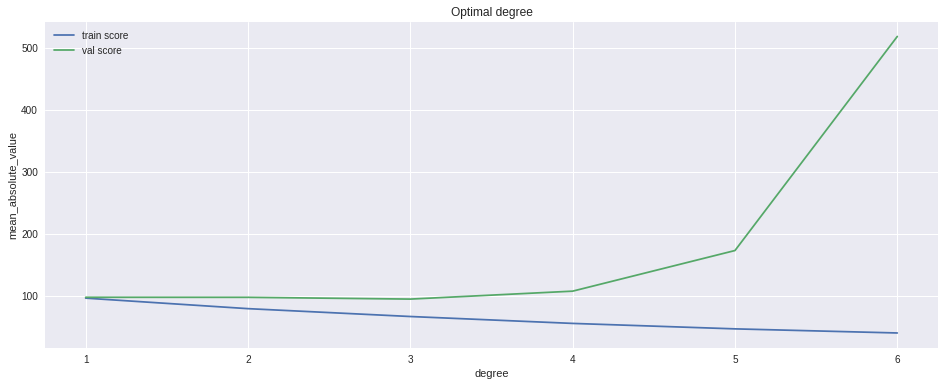

In [56]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(results["degree"], results["average_train_error"])
plt.plot(results["degree"], results["average_val_error"])
plt.xlabel('degree')
plt.ylabel('mean_absolute_value')
plt.title("Optimal degree")
plt.legend(['train score', 'val score'], loc='upper left')

## Apply best model on test set

In [60]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
        
poly = PolynomialFeatures(degree=3)    # generate polynomial features
X_test_poly = poly.fit_transform(X_test)    # fit the raw features
ridge.fit(X_test_poly, y_test)
y_pred_test = ridge.predict(X_test_poly) # predict values for the test data using the linear model 
test_error = mean_absolute_error(y_test, y_pred_test) # calculate the test error



print("The test error is: ",test_error)

The test error is:  92.13861513537105


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
